In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import scipy.fft as fft
import scipy.signal as signal

In [2]:
plt.rcParams['figure.figsize'] = [8, 6]
plt.rcParams['figure.dpi'] = 100

sampling = 0.1

In [3]:
def DFT(data, k):
    N = len(data)
    return sum([data[n]*np.exp(-2j*math.pi*k*n/N) for n in range(0, N)])

def invDFT(data, n):
    N = len(data)
    return sum([data[k]*np.exp(2j*math.pi*k*n/N) for k in range(0, N)])

In [4]:
#applies DFT to array and return an array
def DFTarr(data):
    return [DFT(data, k) for k in range(len(data))]
    
def invDFTarr(data):
    return [invDFT(data, n)/len(data) for n in range(len(data))]

In [5]:
#plots forward and inverse fourier transforms
def testSignal(x, data):
    fig, axs = plt.subplots(3)  #split plot

    f = fft.fft(data, len(data))#vendor DFT
    g = np.asarray(DFTarr(data)) #custom dft
    
    samplingFreq = 1/sampling
    freqAxis = np.arange(-samplingFreq/2, samplingFreq/2, samplingFreq/len(x))
    
    tmp = np.split(f, 2)
    ff = np.concatenate([tmp[1], tmp[0]])
    tmp = np.split(g, 2)
    gg = np.concatenate([tmp[1], tmp[0]])
    
    axs[0].plot(freqAxis, np.abs(ff))
    axs[0].scatter(freqAxis, np.abs(gg), color="red")
    
    axs[1].plot(x, np.abs(f-g))
    
    invF = fft.ifft(f) 
    invG = invDFTarr(g)
    
    axs[2].plot(x, np.real(invF))
    axs[2].scatter(x, np.real(invG), color="red")
    axs[2].scatter(x, data, color="green", s = [10 for i in range(len(x))])

In [6]:
x = np.arange(-10, 10, sampling)

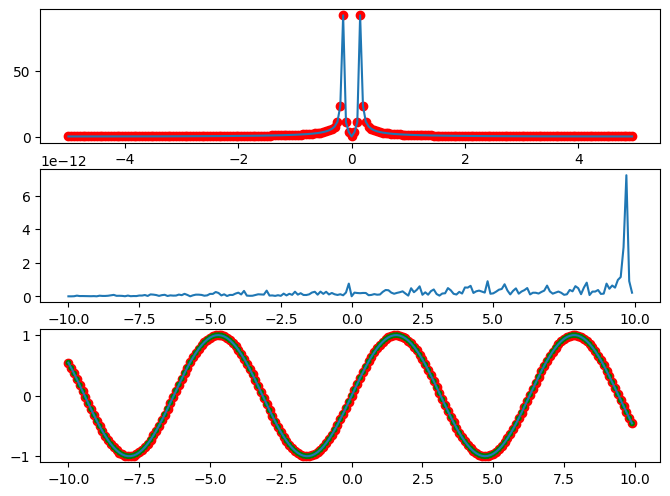

In [7]:
#compare sinus signal
data = np.sin(x)
testSignal(x, data)

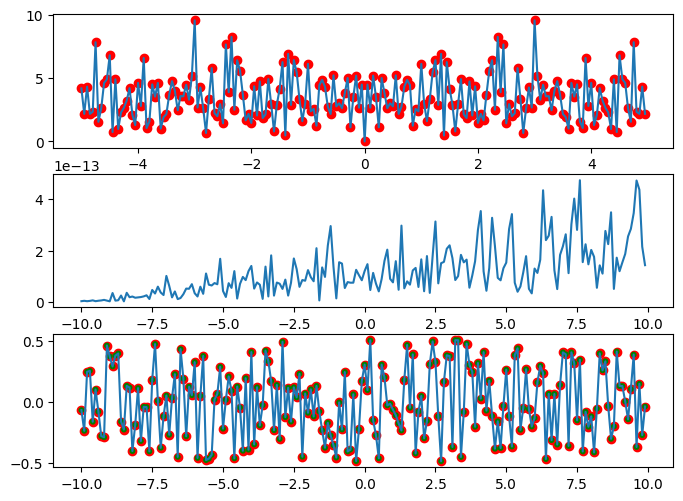

In [8]:
data = np.random.random(len(x))
data -= np.mean(data)
testSignal(x, data)
#bruh that noise

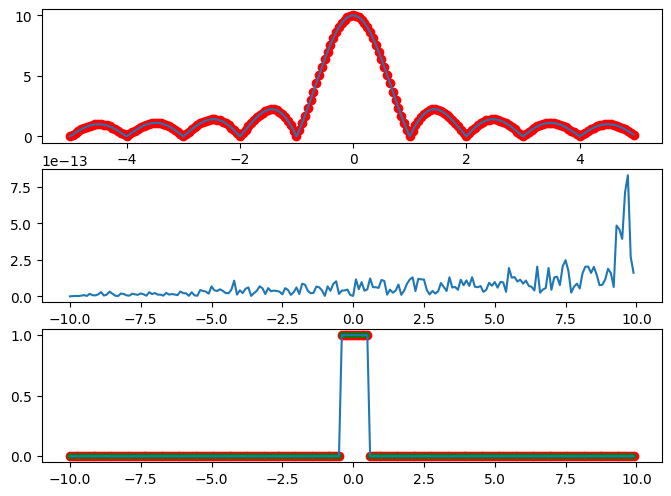

In [9]:
#compare square signal
data = [1 if abs(val)<=0.5 else 0 for val in x]
testSignal(x, data)

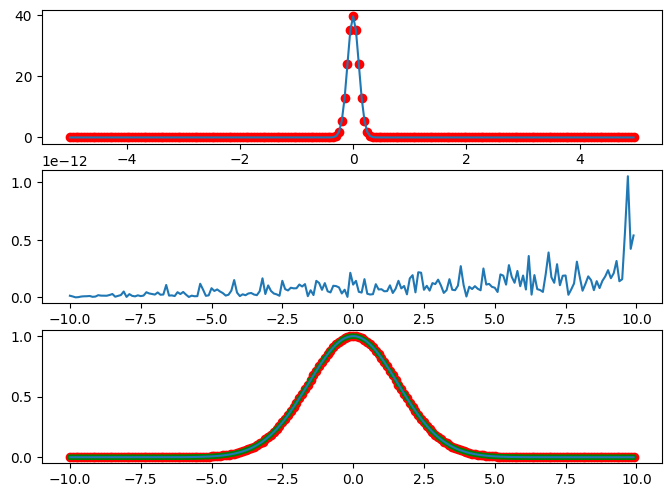

In [10]:
#compare exp signal
data = np.exp(-(x**2)/(2*np.sqrt(2*np.pi)))
testSignal(x, data)

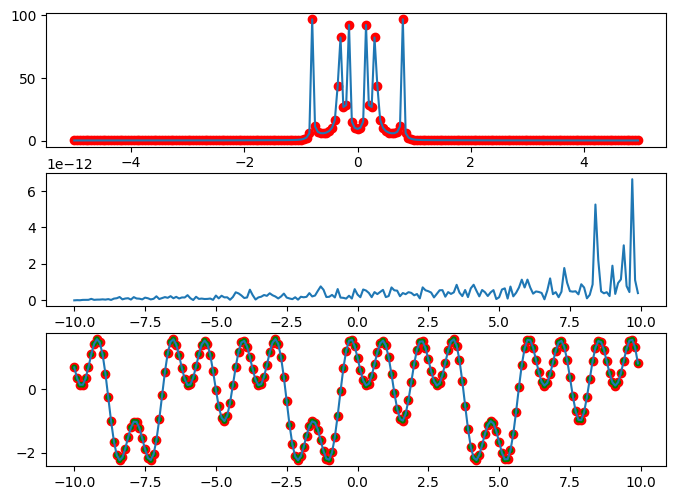

In [11]:
#sin cos summ
data = np.sin(x)+np.cos(-2*x)+np.sin(-5*x)
testSignal(x, data)